# Predictive Modeling #

In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load data
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [4]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [5]:
#Impute values and fix data types
df.avg_rating_of_driver = df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean())
df.avg_rating_by_driver = df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean())

In [6]:
#Clean up data types
df.city = df.city.astype('category')
df.phone = df.phone.astype('category')
df.ultimate_black_user = df.ultimate_black_user.astype('category')
df.signup_date = pd.to_datetime(df.signup_date, errors='coerce')
df.last_trip_date = pd.to_datetime(df.last_trip_date, errors='coerce')

In [7]:
#Create dummy variables
df = pd.get_dummies(df)
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0


<AxesSubplot:xlabel='tenure'>

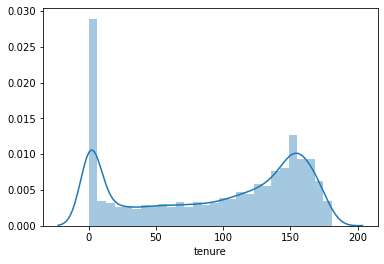

In [23]:
#Calculate tenure from signup date to last trip
df['tenure'] = (df.last_trip_date - df.signup_date).dt.days
sns.distplot(df.tenure)

In [24]:
#Calculate target variable
df['target'] = np.where(df.tenure >= 150, 1,0)
df.target.value_counts()

0    37286
1    12714
Name: target, dtype: int64

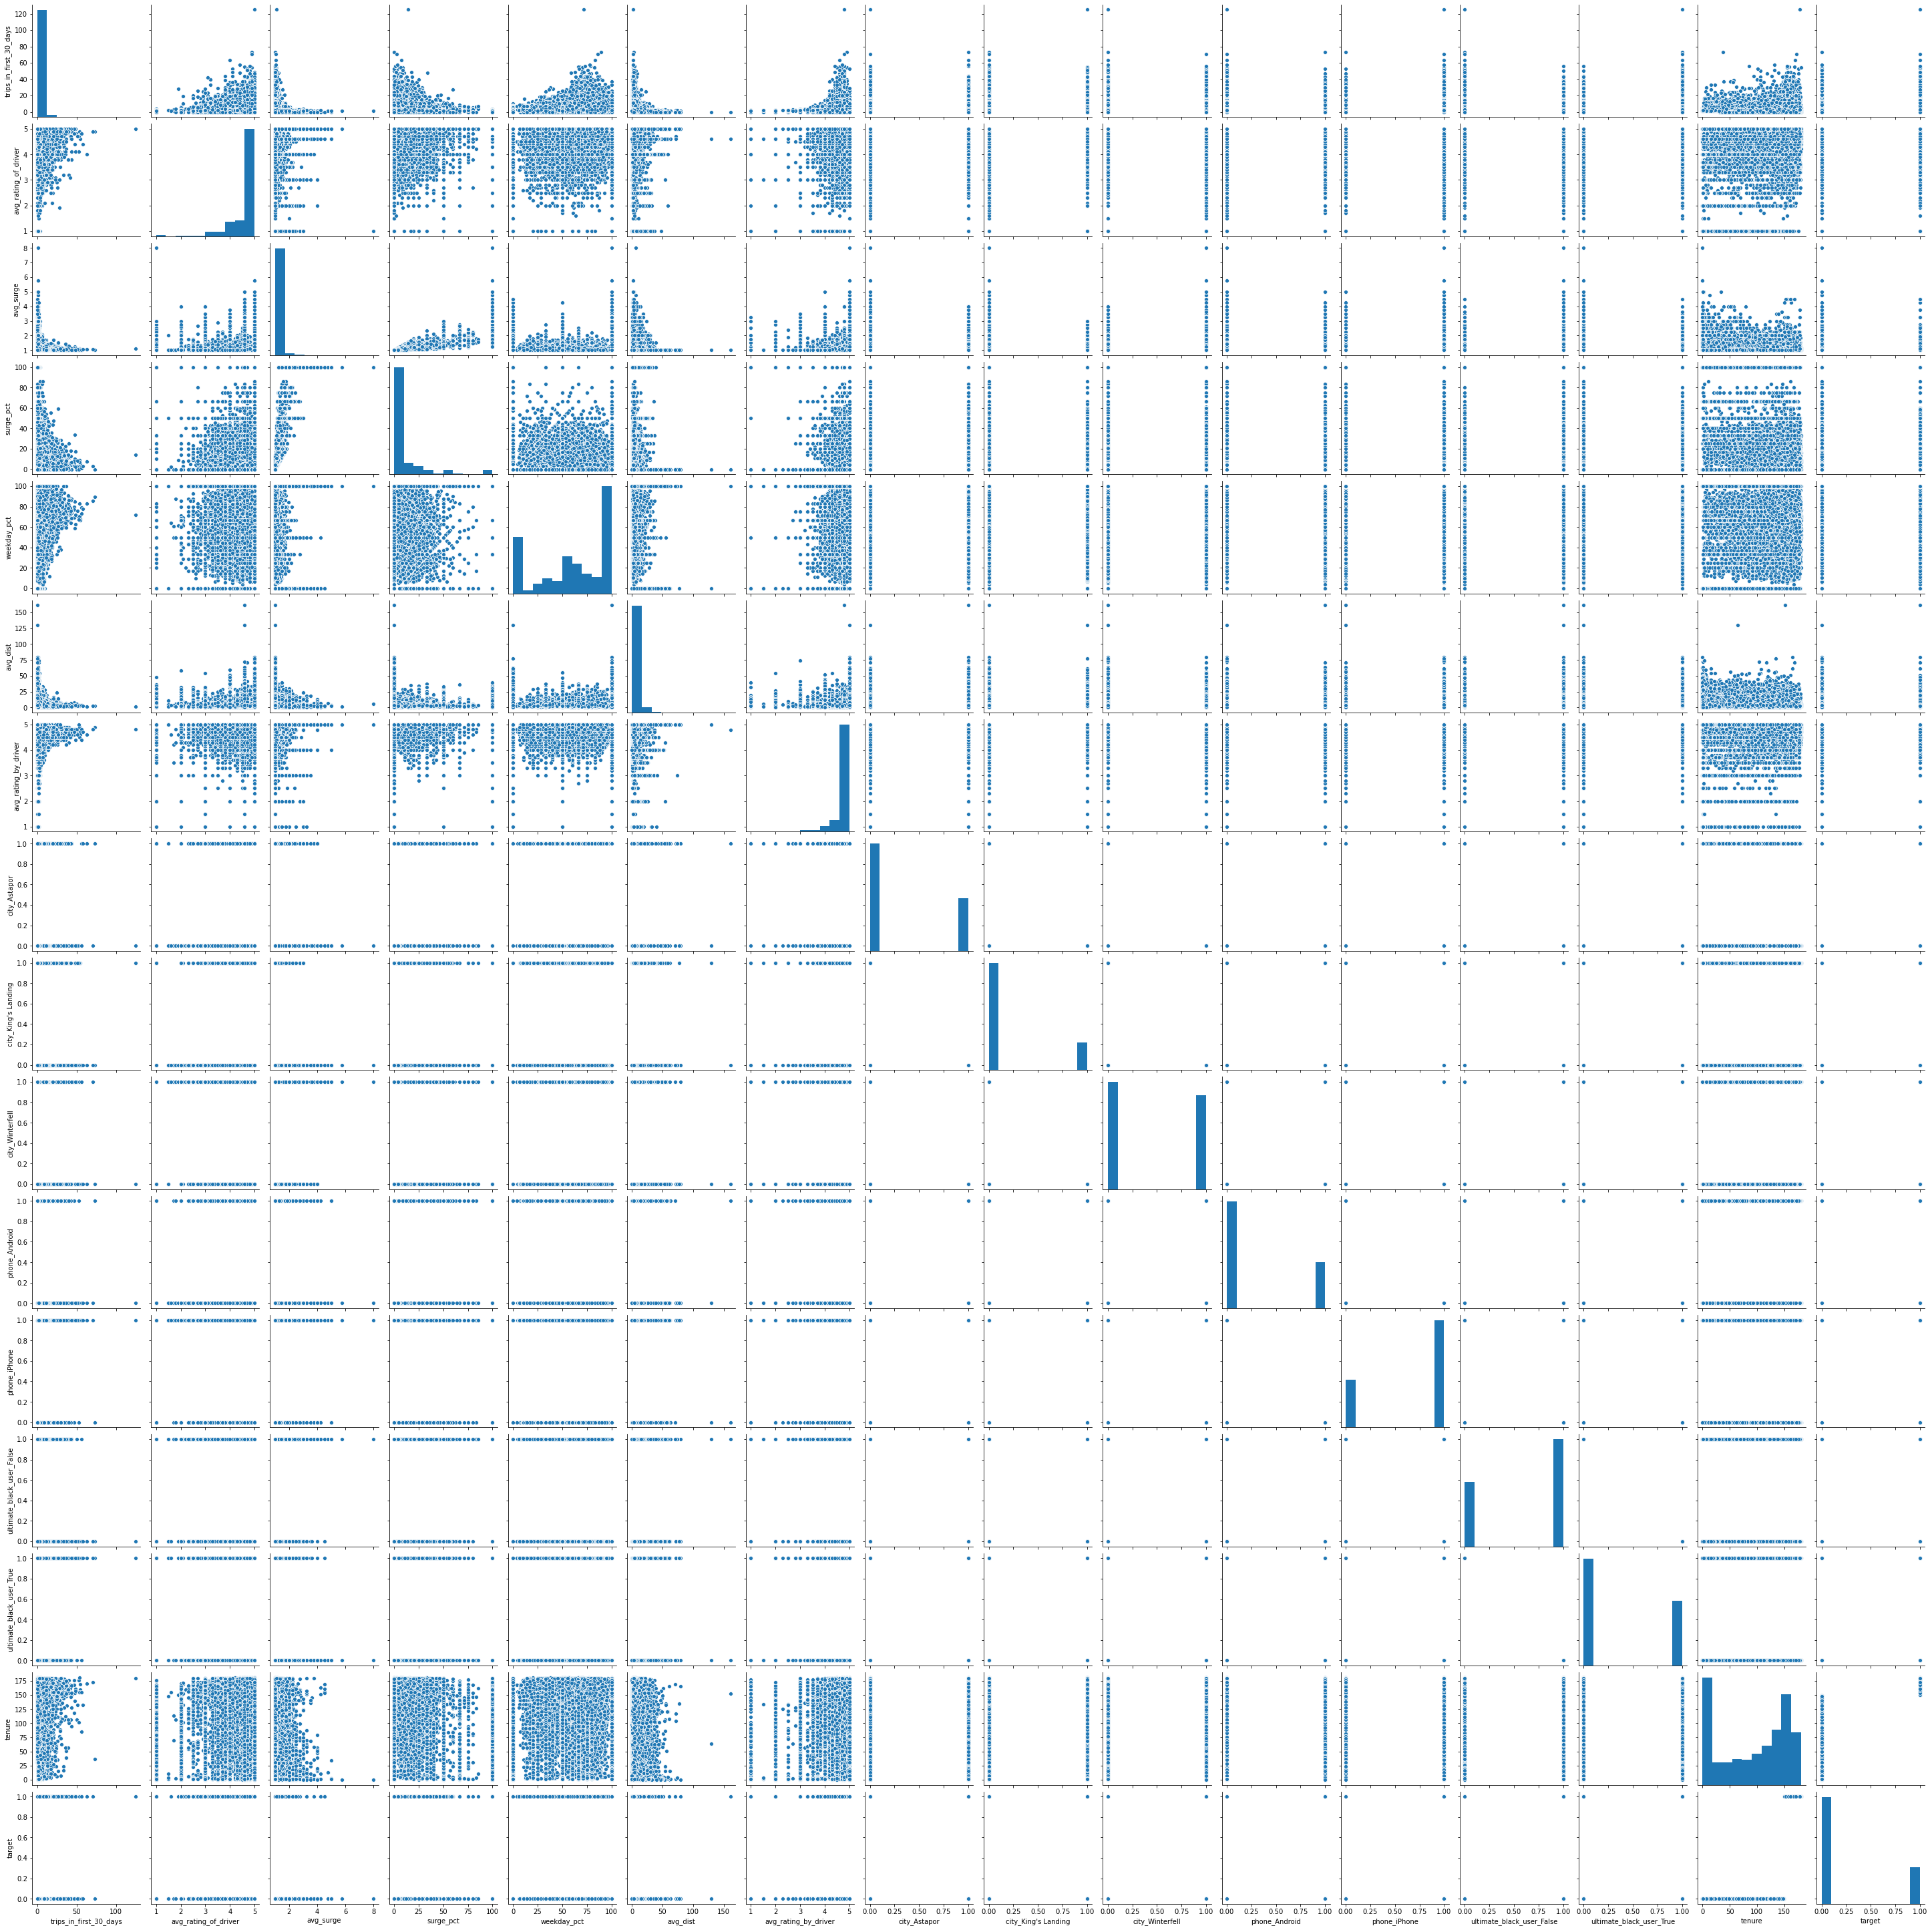

In [25]:
sns.pairplot(df)
plt.savefig("Raw Data - Seaborn Pairplot.png")
plt.show()

In [26]:
df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,tenure,target
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.050388,-0.136329,-0.039097,-0.061075,0.024650,0.037735,-0.059309,0.058342,-0.112210,0.112210,0.164784,0.210011
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,0.012587,0.028508,0.101660,0.029814,0.082156,-0.094304,0.024206,-0.024323,0.001916,-0.001916,-0.015183,-0.007991
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.110071,-0.081491,0.010498,0.037172,-0.009198,-0.027643,-0.008977,0.011104,0.078791,-0.078791,-0.016809,0.006780
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.144918,-0.104414,0.019964,0.045457,0.028221,-0.065603,-0.010150,0.012851,0.106861,-0.106861,0.004068,0.017825
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,1.000000,0.101652,0.020366,-0.010540,0.031349,-0.015318,-0.009241,0.006726,-0.035998,0.035998,0.020408,0.007811
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.101652,1.000000,0.079793,-0.045431,0.015877,0.030050,0.020888,-0.025030,-0.032310,0.032310,-0.109431,-0.092038
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.020366,0.079793,1.000000,0.032518,0.084480,-0.098727,0.008765,-0.010127,-0.009328,0.009328,-0.032651,-0.021399
city_Astapor,-0.061075,0.029814,0.037172,0.045457,-0.010540,-0.045431,0.032518,1.000000,-0.354298,-0.657563,0.025642,-0.024539,-0.021259,0.021259,-0.119001,-0.134652
city_King's Landing,0.024650,0.082156,-0.009198,0.028221,0.031349,0.015877,0.084480,-0.354298,1.000000,-0.471555,-0.059203,0.060520,-0.039649,0.039649,0.193598,0.187189
city_Winterfell,0.037735,-0.094304,-0.027643,-0.065603,-0.015318,0.030050,-0.098727,-0.657563,-0.471555,1.000000,0.023517,-0.025618,0.051990,-0.051990,-0.043755,-0.023833


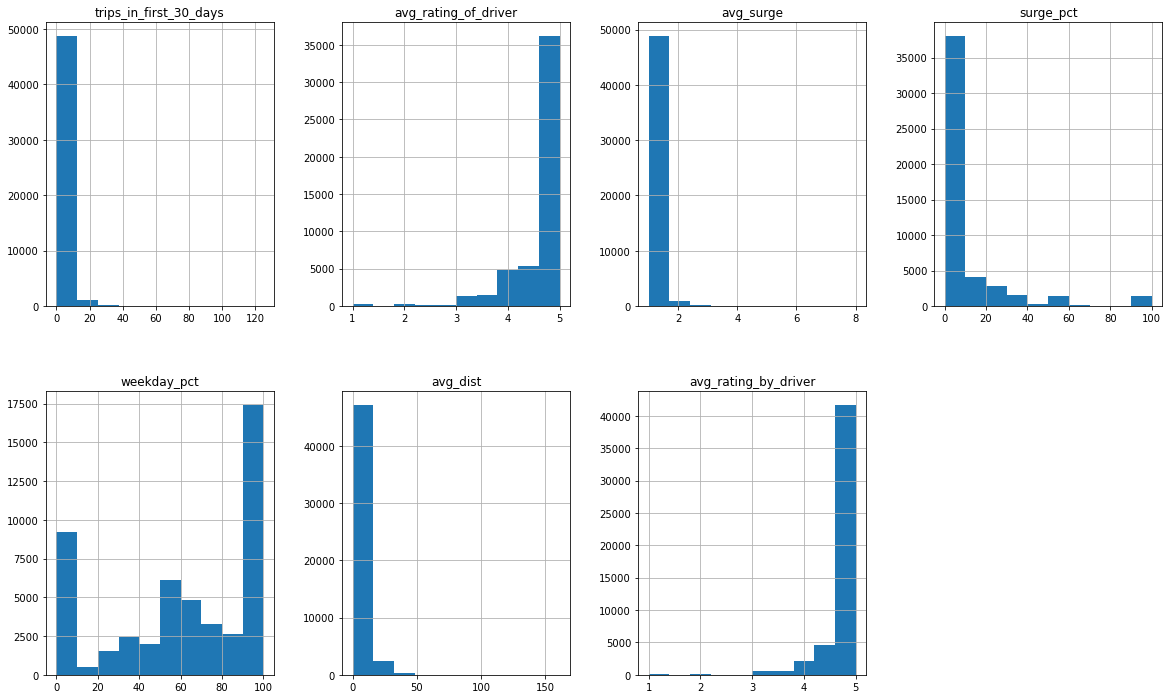

In [29]:
cols = [
    'trips_in_first_30_days',
    'avg_rating_of_driver',
    'avg_surge',
    'surge_pct',
    'weekday_pct',
    'avg_dist',
    'avg_rating_by_driver'
]
fig = df[cols].hist(layout = (2,4), figsize = (20,12))
plt.savefig('Histograms of Numerical Data.png')
plt.show()

In [33]:
#Drop original dates
df = df.drop(['signup_date','last_trip_date'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

KeyError: "['signup_date' 'last_trip_date'] not found in axis"

In [34]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,tenure,target
0,0.453984,1.742403e-01,0.113506,0.328202,-0.397131,-0.372650,0.497684,-0.702890,1.983894,-0.935515,-0.655340,0.667712,-1.285285,1.285285,0.808153,-0.583940
1,-0.600689,7.052411e-01,-0.336268,-0.443394,-0.294653,0.431583,0.497684,1.422699,-0.504059,-0.935515,1.525926,-1.497652,0.778038,-0.778038,0.051665,-0.583940
2,0.190316,-5.337607e-01,-0.336268,-0.443394,1.053741,-0.880771,0.497684,1.422699,-0.504059,-0.935515,-0.655340,0.667712,0.778038,-0.778038,-1.477407,-0.583940
3,1.772325,-2.759950e-03,0.293416,0.558679,0.514383,-0.602181,0.273342,-0.702890,1.983894,-0.935515,-0.655340,0.667712,-1.285285,1.285285,1.242731,1.712505
4,3.090665,-3.567605e-01,0.518303,0.147829,0.579106,-0.467266,0.273342,-0.702890,-0.504059,1.068930,1.525926,-1.497652,0.778038,-0.778038,-0.737014,-0.583940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.600689,7.052411e-01,-0.336268,-0.443394,1.053741,-0.029230,-1.297050,-0.702890,1.983894,-0.935515,-0.655340,0.667712,0.778038,-0.778038,0.615007,-0.583940
49996,-0.337021,-2.766857e-13,-0.336268,-0.443394,-1.643048,-1.015686,-1.745733,1.422699,-0.504059,-0.935515,-0.655340,0.667712,0.778038,-0.778038,-1.477407,-0.583940
49997,-0.600689,7.052411e-01,-0.336268,-0.443394,1.053741,-0.339360,0.497684,-0.702890,-0.504059,1.068930,1.525926,-1.497652,-1.285285,1.285285,0.293097,-0.583940
49998,-0.073352,-2.834764e+00,-0.336268,-0.443394,1.053741,-0.213205,-2.867442,1.422699,-0.504059,-0.935515,-0.655340,0.667712,0.778038,-0.778038,-1.477407,-0.583940


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df.drop(['tenure','target'],axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42).fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\SiddharthaMisra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7617

In [ ]:
%pip install pycaret
%pip install shap